#Projeto 6

#Modelo SIR
Equacoes do modelo SIR utilizadas para os calculos, usando o fator de acoplamento entre as cidades:
##$
\frac{dS_{vertice}}{dt}=-r*S_{vertice}*(I_{vertice}+\sumγ_{arestas}*I_{arestas})
$
##$
\frac{dI_{vertice}}{dt}=r*S_{vertice}*(I_{vertice}+\sum γ_{arestas}*I_{arestas}) - a(I_{vertice}+γ_{arestas}*I_{arestas})
$
##$
\frac{dR_{vertice}}{dt}=a(I_{vertice}+\sumγ_{arestas}*I_{arestas})
$

Como utilizamos um modelo que simula algumas cidades do estado de São Paulo, as populações permanecerão as mesmas para todas as simulações, além de estarem representadas em escala, com São Paulo, a maior cidade, tendo 1000 habitantes e assim por diante.

## Versão Determinística do Modelo

###Simulação 1

Nesta simulação, consideramos taxas de contaminação moderadas e 5 dias para a recuperação dos doentes. Nesse caso, também mantivemos as taxas de mobilidade entre as cidades normais, considerando que há maior fluxo de pessoas de cidades menores em direção a cidades maiores.

In [ ]:
#Bibliotecas
from matplotlib import pyplot as plt
import matplotlib.animation as animation
import networkx as nx
import random as rd
import numpy as np


####Parametros

In [ ]:
n = 10
TMax = 60
DT = 0.01
tl = np.arange(DT, TMax, DT)

# Parametros de cada regiao
N0 = 1000
I0 = 1
R0 = 0
S0 = N0 - I0 - R0
r0 = 0.007
a0 = 1/5

N1 = 20
I1 = 0
R1 = 0
S1 = N1 - I1 - R1
r1 = 0.02
a1 = 1/5

N2 = 17
I2 = 0
R2 = 0
S2 = N2 - I2 - R2
r2 = 0.03
a2 = 1/5

N3 = 42
I3 = 0
R3 = 0
S3 = N3 - I3 - R3
r3 = 0.04
a3 = 1/5

N4 = 18
I4 = 0
R4 = 0
S4 = N4 - I4 - R4
r4 = 0.033
a4 = 1/5

N5 = 70
I5 = 0.1
R5 = 0
S5 = N5 - I5 - R5
r5 = 0.0043
a5 = 1/5

N6 = 70
I6 = 0.1
R6 = 0
S6 = N6 - I6 - R6
r6 = 0.005
a6 = 1/5

N7 = 73
I7 = 0.1
R7 = 0
S7 = N7 - I7 - R7
r7 = 0.005
a7 =1/5

N8 = 140
I8 = 0.1
R8 = 0
S8 = N8 - I8 - R8
r8 = 0.003
a8 = 1/5

N9 = 13
I9 = 0
R9 = 0
S9 = N9 - I9 - R9
r9 = 0.04
a9 = 1/5

pop_total = N0 + N1 + N2 + N3 + N4 + N5 + N6 + N7 + N8 + N9
# Listas dos Parametros
lista_parametros = [[S0,I0,R0,a0,r0],[S1,I1,R1,a1,r1],[S2,I2,R2,a2,r2],[S3,I3,R3,a3,r3],[S4,I4,R4,a4,r4],[S5,I5,R5,a5,r5],[S6,I6,R6,a6,r6],[S7,I7,R7,a7,r7],[S8,I8,R8,a8,r8],[S9,I9,R9,a9,r9]]


# Listas
Sl = [[0 for j in range(len(tl))]for i in range(n)]
Il = [[0 for j in range(len(tl))]for i in range(n)]
Rl = [[0 for j in range(len(tl))]for i in range(n)]

for i in range(n):
  Sl[i][0] = lista_parametros[i][0]
  Il[i][0] = lista_parametros[i][1]
  Rl[i][0] = lista_parametros[i][2]

####Criação do grafo

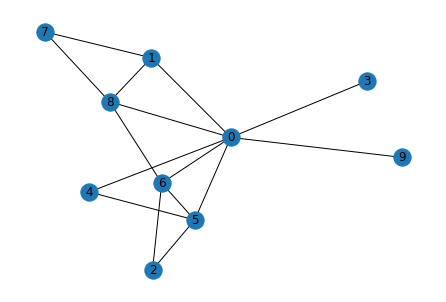

In [ ]:
#criar Grafo
G = nx.Graph()
G.add_node(0) # Cidade de São Paulo
G.add_node(1) # Cidade de Jacarei 
G.add_node(2)  # Cidade de Itapetininga
G.add_node(3) # Cidade de Jundiai
G.add_node(4) # Cidade de Itu
G.add_node(5)  # Cidade de Sorocaba
G.add_node(6)  # Cidade de Osasco
G.add_node(7) # Cidade de São jose dos campos
G.add_node(8) # Cidade de Guarulhos
G.add_node(9) # Cidade de Cubatão
G.add_edge(0,1) #1
G.add_edge(0,3) #2
G.add_edge(0,4) #3
G.add_edge(0,5) #4
G.add_edge(0,6) #5
G.add_edge(0,8) #6
G.add_edge(0,9) #7
G.add_edge(7,1) #8
G.add_edge(2,5) #9
G.add_edge(6,8) #10
G.add_edge(6,5) #11
G.add_edge(6,2) #12
G.add_edge(4,5) #13
G.add_edge(8,1) #14
G.add_edge(8,7) #15
g1 = 0.01
g2 = 0.01
g3 = 0.01
g4 = 0.01
g5 = 0.01
g6 = 0.01
g7 = 0.01
g8 = 0.02
g9 = 0.008
g10 = 0.03
g11 = 0.03
g12 = 0.09
g13 = 0.06
g14 = 0.005
g15 = 0.07

nx.draw(G, with_labels = True, pos = nx.spring_layout(G,  seed = 100))

####Cálculos e análise

In [ ]:
#calculos
count = 0
for t in np.arange(DT, TMax, DT):
   #print("count:", count)
  var = 0
  for i in G:
    if count == 0:
      var = count
    else:
      var = count - 1
    
    Si = Sl[i][var]
    Ii = Il[i][var]
    Ri = Rl[i][var]
    r = lista_parametros[i][4]
    a = lista_parametros[i][3]

    soma = Ii
    if i == 0: # Sp
      soma += (g1 * Il[1][var]) + (g2 * Il[3][var]) + (g3 * Il[4][var]) + (g4 * Il[5][var]) + (g5 * Il[6][var]) + (g6 * Il[8][var]) + (g7 * Il[9][var])
      #print(soma)
    if i == 1: # Jacarei
      soma += g1 * Il[0][var] + g8 * Il[7][var] + g14 * Il[8][var]
    if i == 2:  
      soma += g9 * Il[5][var] + g12 * Il[6][var]
    if i == 3:
      soma += g2 * Il[0][var]
    if i == 4: # Itu
      soma += g3 * Il[0][var] + g13 * Il[5][var]
    if i == 5:
      soma += g4 * Il[0][var] + g9 * Il[2][var] + g11 * Il[6][var] + g13 * Il[4][var]
    if i == 6:
      soma += g5 * Il[0][var] + g10 * Il[8][var] + g11 * Il[5][var] + g12 * Il[2][var]
    if i == 7:
      soma += g8 * Il[1][var] + g15 * Il[8][var]
    if i == 8:
      soma += g6 * Il[0][var] + g10 * Il[6][var] + g14 * Il[1][var] + g15 * Il[7][var]
    if i == 9:
      soma += g7 * Il[0][var]

    Si += ((-1)* r * Si * soma) * DT
    Ii += (r * Si *soma - a * soma) * DT
    Ri += (a * soma )* DT
    Sl[i][count] = Si
    Il[i][count] = Ii
    Rl[i][count] = Ri
  count += 1



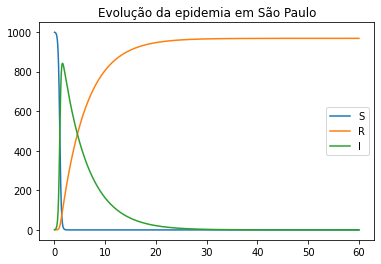

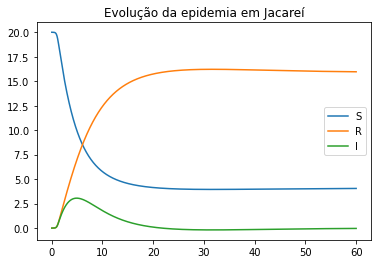

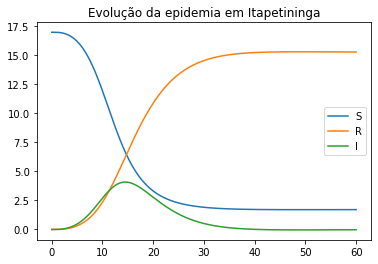

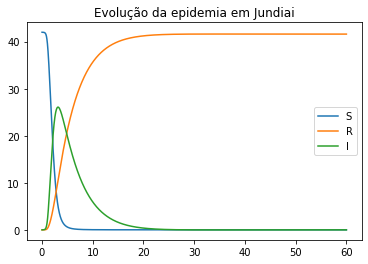

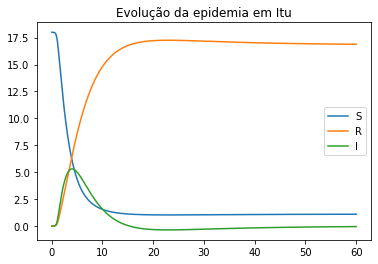

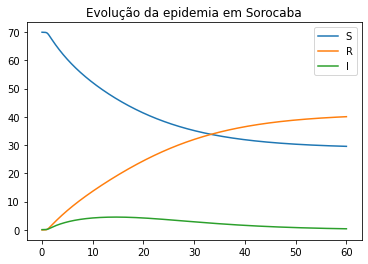

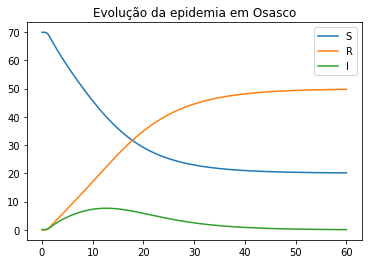

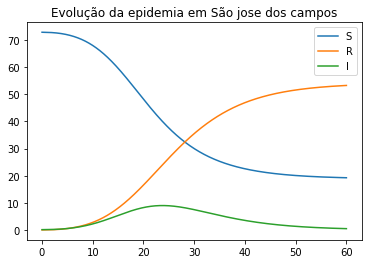

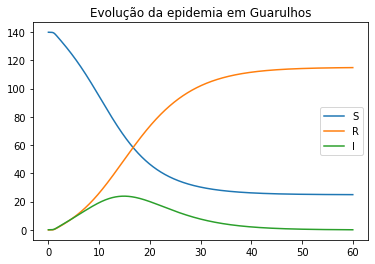

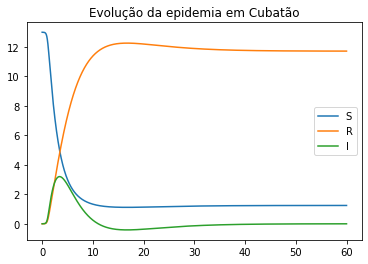

In [ ]:
names = ["São Paulo", "Jacareí", "Itapetininga", "Jundiai", "Itu", "Sorocaba", "Osasco", "São jose dos campos", "Guarulhos", "Cubatão" ]
for i in range(n):
  plt.title(f"Evolução da epidemia em {names[i]}")
  plt.plot(tl, Sl[i], label='S')
  plt.plot(tl, Rl[i], label='R')
  plt.plot(tl, Il[i], label='I')
  plt.legend()
  plt.show()

###Simulação 2

Nesta simulação, consideramos taxas de contaminação elevadas nas cidades de São Paulo e São José dos Campos, além de mobilidade reduzida para estas cidades, como forma lockdown, para controle de casos, além de 5 dias para a recuperação dos doentes.

In [ ]:
#Bibliotecas
from matplotlib import pyplot as plt
import matplotlib.animation as animation
import networkx as nx
import random as rd
import numpy as np


####Parametros

In [ ]:
n = 10
TMax = 60
DT = 0.01
tl = np.arange(DT, TMax, DT)

# Parametros de cada regiao
N0 = 1000
I0 = 1
R0 = 0
S0 = N0 - I0 - R0
r0 = 0.01
a0 = 1/5

N1 = 20
I1 = 0
R1 = 0
S1 = N1 - I1 - R1
r1 = 0.02
a1 = 1/5

N2 = 17
I2 = 0
R2 = 0
S2 = N2 - I2 - R2
r2 = 0.03
a2 = 1/5

N3 = 42
I3 = 0
R3 = 0
S3 = N3 - I3 - R3
r3 = 0.04
a3 = 1/5

N4 = 18
I4 = 0
R4 = 0
S4 = N4 - I4 - R4
r4 = 0.033
a4 = 1/5

N5 = 70
I5 = 0.1
R5 = 0
S5 = N5 - I5 - R5
r5 = 0.0043
a5 = 1/5

N6 = 70
I6 = 0.1
R6 = 0
S6 = N6 - I6 - R6
r6 = 0.005
a6 = 1/5

N7 = 73
I7 = 0.1
R7 = 0
S7 = N7 - I7 - R7
r7 = 0.009
a7 =1/5

N8 = 140
I8 = 0.1
R8 = 0
S8 = N8 - I8 - R8
r8 = 0.003
a8 = 1/5

N9 = 13
I9 = 0
R9 = 0
S9 = N9 - I9 - R9
r9 = 0.04
a9 = 1/5

pop_total = N0 + N1 + N2 + N3 + N4 + N5 + N6 + N7 + N8 + N9
# Listas dos Parametros
lista_parametros = [[S0,I0,R0,a0,r0],[S1,I1,R1,a1,r1],[S2,I2,R2,a2,r2],[S3,I3,R3,a3,r3],[S4,I4,R4,a4,r4],[S5,I5,R5,a5,r5],[S6,I6,R6,a6,r6],[S7,I7,R7,a7,r7],[S8,I8,R8,a8,r8],[S9,I9,R9,a9,r9]]


# Listas
Sl = [[0 for j in range(len(tl))]for i in range(n)]
Il = [[0 for j in range(len(tl))]for i in range(n)]
Rl = [[0 for j in range(len(tl))]for i in range(n)]

for i in range(n):
  Sl[i][0] = lista_parametros[i][0]
  Il[i][0] = lista_parametros[i][1]
  Rl[i][0] = lista_parametros[i][2]


####Criação do grafo

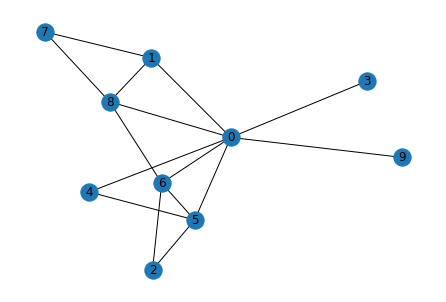

In [ ]:
#criar Grafo
G = nx.Graph()
G.add_node(0) # Cidade de São Paulo
G.add_node(1) # Cidade de Jacarei 
G.add_node(2)  # Cidade de Itapetininga
G.add_node(3) # Cidade de Jundiai
G.add_node(4) # Cidade de Itu
G.add_node(5)  # Cidade de Sorocaba
G.add_node(6)  # Cidade de Osasco
G.add_node(7) # Cidade de São jose dos campos
G.add_node(8) # Cidade de Guarulhos
G.add_node(9) # Cidade de Cubatão
G.add_edge(0,1) #1
G.add_edge(0,3) #2
G.add_edge(0,4) #3
G.add_edge(0,5) #4
G.add_edge(0,6) #5
G.add_edge(0,8) #6
G.add_edge(0,9) #7
G.add_edge(7,1) #8
G.add_edge(2,5) #9
G.add_edge(6,8) #10
G.add_edge(6,5) #11
G.add_edge(6,2) #12
G.add_edge(4,5) #13
G.add_edge(8,1) #14
G.add_edge(8,7) #15
g1 = 0.005
g2 = 0.005
g3 = 0.005
g4 = 0.005
g5 = 0.005
g6 = 0.005
g7 = 0.005
g8 = 0.005
g9 = 0.008
g10 = 0.025
g11 = 0.025
g12 = 0.07
g13 = 0.04
g14 = 0.005
g15 = 0.03

nx.draw(G, with_labels = True, pos = nx.spring_layout(G,  seed = 100))

####Cálculos e análise

In [ ]:
#calculos
count = 0
for t in np.arange(DT, TMax, DT):
   #print("count:", count)
  var = 0
  for i in G:
    if count == 0:
      var = count
    else:
      var = count - 1
    
    Si = Sl[i][var]
    Ii = Il[i][var]
    Ri = Rl[i][var]
    r = lista_parametros[i][4]
    a = lista_parametros[i][3]

    soma = Ii
    if i == 0: # Sp
      soma += (g1 * Il[1][var]) + (g2 * Il[3][var]) + (g3 * Il[4][var]) + (g4 * Il[5][var]) + (g5 * Il[6][var]) + (g6 * Il[8][var]) + (g7 * Il[9][var])
      #print(soma)
    if i == 1: # Jacarei
      soma += g1 * Il[0][var] + g8 * Il[7][var] + g14 * Il[8][var]
    if i == 2:  
      soma += g9 * Il[5][var] + g12 * Il[6][var]
    if i == 3:
      soma += g2 * Il[0][var]
    if i == 4: # Itu
      soma += g3 * Il[0][var] + g13 * Il[5][var]
    if i == 5:
      soma += g4 * Il[0][var] + g9 * Il[2][var] + g11 * Il[6][var] + g13 * Il[4][var]
    if i == 6:
      soma += g5 * Il[0][var] + g10 * Il[8][var] + g11 * Il[5][var] + g12 * Il[2][var]
    if i == 7:
      soma += g8 * Il[1][var] + g15 * Il[8][var]
    if i == 8:
      soma += g6 * Il[0][var] + g10 * Il[6][var] + g14 * Il[1][var] + g15 * Il[7][var]
    if i == 9:
      soma += g7 * Il[0][var]

    Si += ((-1)* r * Si * soma) * DT
    Ii += (r * Si *soma - a * soma) * DT
    Ri += (a * soma )* DT
    Sl[i][count] = Si
    Il[i][count] = Ii
    Rl[i][count] = Ri
  count += 1



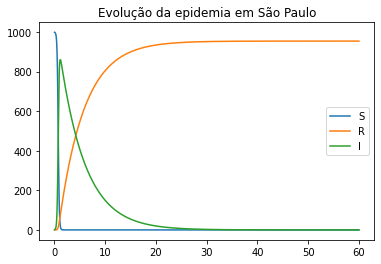

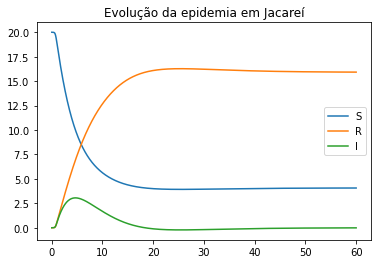

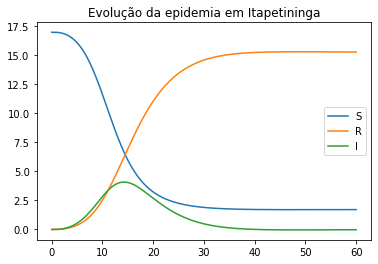

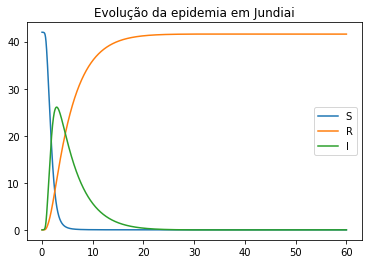

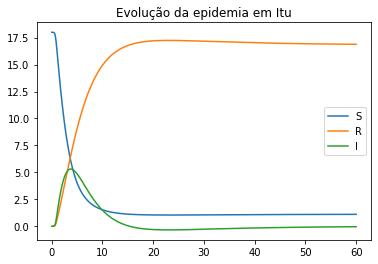

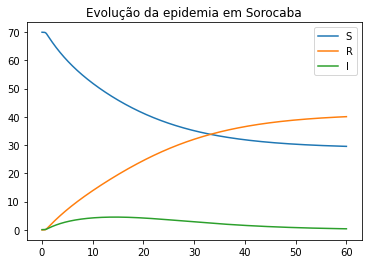

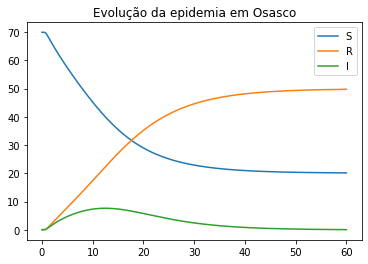

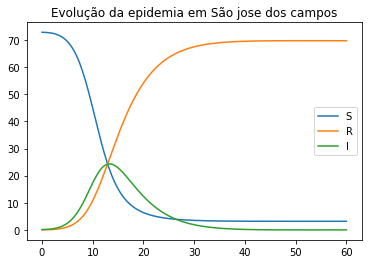

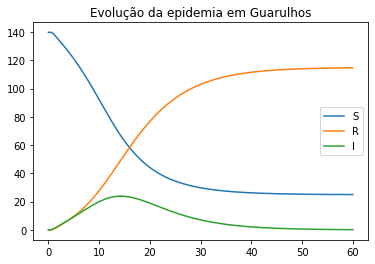

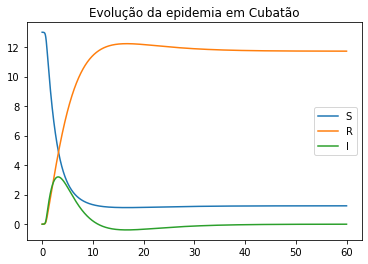

In [ ]:
names = ["São Paulo", "Jacareí", "Itapetininga", "Jundiai", "Itu", "Sorocaba", "Osasco", "São jose dos campos", "Guarulhos", "Cubatão" ]
for i in range(n):
  plt.title(f"Evolução da epidemia em {names[i]}")
  plt.plot(tl, Sl[i], label='S')
  plt.plot(tl, Rl[i], label='R')
  plt.plot(tl, Il[i], label='I')
  plt.legend()
  plt.show()

###Simulação 3

Para esta simulação, usamos uma maior quantidade de infectados nas cidades, o que levou a um aumento nas medidas de contenção do vírus, como lockdowns mais severos na maioria das cidades. Assim, as taxas de mobilidade são menores, mas como ainda há mauitos infectados, as taxas de infecção permanecem um pouco elevadas, contidas pelos lockdowns.

In [ ]:
#Bibliotecas
from matplotlib import pyplot as plt
import matplotlib.animation as animation
import networkx as nx
import random as rd
import numpy as np


####Parametros

In [ ]:
n = 10
TMax = 60
DT = 0.01
tl = np.arange(DT, TMax, DT)

# Parametros de cada regiao
N0 = 1000
I0 = 10
R0 = 0
S0 = N0 - I0 - R0
r0 = 0.015
a0 = 1/5

N1 = 20
I1 = 0.5
R1 = 0
S1 = N1 - I1 - R1
r1 = 0.02
a1 = 1/5

N2 = 17
I2 = 0.5
R2 = 0
S2 = N2 - I2 - R2
r2 = 0.03
a2 = 1/5

N3 = 42
I3 = 0.7
R3 = 0
S3 = N3 - I3 - R3
r3 = 0.047
a3 = 1/5

N4 = 18
I4 = 0.5
R4 = 0
S4 = N4 - I4 - R4
r4 = 0.036
a4 = 1/5

N5 = 70
I5 = 0.3
R5 = 0
S5 = N5 - I5 - R5
r5 = 0.0043
a5 = 1/5

N6 = 70
I6 = 0.4
R6 = 0
S6 = N6 - I6 - R6
r6 = 0.008
a6 = 1/5

N7 = 73
I7 = 0.2
R7 = 0
S7 = N7 - I7 - R7
r7 = 0.012
a7 =1/5

N8 = 140
I8 = 0.34
R8 = 0
S8 = N8 - I8 - R8
r8 = 0.003
a8 = 1/5

N9 = 13
I9 = 0
R9 = 0
S9 = N9 - I9 - R9
r9 = 0.04
a9 = 1/5

pop_total = N0 + N1 + N2 + N3 + N4 + N5 + N6 + N7 + N8 + N9
# Listas dos Parametros
lista_parametros = [[S0,I0,R0,a0,r0],[S1,I1,R1,a1,r1],[S2,I2,R2,a2,r2],[S3,I3,R3,a3,r3],[S4,I4,R4,a4,r4],[S5,I5,R5,a5,r5],[S6,I6,R6,a6,r6],[S7,I7,R7,a7,r7],[S8,I8,R8,a8,r8],[S9,I9,R9,a9,r9]]


# Listas
Sl = [[0 for j in range(len(tl))]for i in range(n)]
Il = [[0 for j in range(len(tl))]for i in range(n)]
Rl = [[0 for j in range(len(tl))]for i in range(n)]

for i in range(n):
  Sl[i][0] = lista_parametros[i][0]
  Il[i][0] = lista_parametros[i][1]
  Rl[i][0] = lista_parametros[i][2]


####Criação do grafo

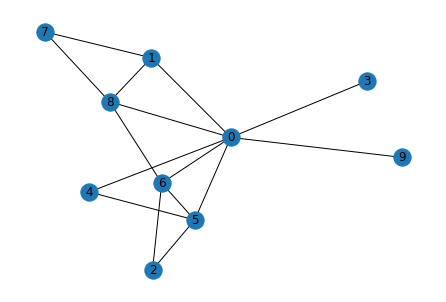

In [ ]:
#criar Grafo
G = nx.Graph()
G.add_node(0) # Cidade de São Paulo
G.add_node(1) # Cidade de Jacarei 
G.add_node(2)  # Cidade de Itapetininga
G.add_node(3) # Cidade de Jundiai
G.add_node(4) # Cidade de Itu
G.add_node(5)  # Cidade de Sorocaba
G.add_node(6)  # Cidade de Osasco
G.add_node(7) # Cidade de São jose dos campos
G.add_node(8) # Cidade de Guarulhos
G.add_node(9) # Cidade de Cubatão
G.add_edge(0,1) #1
G.add_edge(0,3) #2
G.add_edge(0,4) #3
G.add_edge(0,5) #4
G.add_edge(0,6) #5
G.add_edge(0,8) #6
G.add_edge(0,9) #7
G.add_edge(7,1) #8
G.add_edge(2,5) #9
G.add_edge(6,8) #10
G.add_edge(6,5) #11
G.add_edge(6,2) #12
G.add_edge(4,5) #13
G.add_edge(8,1) #14
G.add_edge(8,7) #15
g1 = 0.0035
g2 = 0.0035
g3 = 0.0035
g4 = 0.0035
g5 = 0.0035
g6 = 0.0035
g7 = 0.0035
g8 = 0.0035
g9 = 0.004
g10 = 0.018
g11 = 0.017
g12 = 0.05
g13 = 0.025
g14 = 0.0035
g15 = 0.02

nx.draw(G, with_labels = True, pos = nx.spring_layout(G,  seed = 100))

####Cálculos e análise

In [ ]:
#calculos
count = 0
for t in np.arange(DT, TMax, DT):
   #print("count:", count)
  var = 0
  for i in G:
    if count == 0:
      var = count
    else:
      var = count - 1
    
    Si = Sl[i][var]
    Ii = Il[i][var]
    Ri = Rl[i][var]
    r = lista_parametros[i][4]
    a = lista_parametros[i][3]

    soma = Ii
    if i == 0: # Sp
      soma += (g1 * Il[1][var]) + (g2 * Il[3][var]) + (g3 * Il[4][var]) + (g4 * Il[5][var]) + (g5 * Il[6][var]) + (g6 * Il[8][var]) + (g7 * Il[9][var])
      #print(soma)
    if i == 1: # Jacarei
      soma += g1 * Il[0][var] + g8 * Il[7][var] + g14 * Il[8][var]
    if i == 2:  
      soma += g9 * Il[5][var] + g12 * Il[6][var]
    if i == 3:
      soma += g2 * Il[0][var]
    if i == 4: # Itu
      soma += g3 * Il[0][var] + g13 * Il[5][var]
    if i == 5:
      soma += g4 * Il[0][var] + g9 * Il[2][var] + g11 * Il[6][var] + g13 * Il[4][var]
    if i == 6:
      soma += g5 * Il[0][var] + g10 * Il[8][var] + g11 * Il[5][var] + g12 * Il[2][var]
    if i == 7:
      soma += g8 * Il[1][var] + g15 * Il[8][var]
    if i == 8:
      soma += g6 * Il[0][var] + g10 * Il[6][var] + g14 * Il[1][var] + g15 * Il[7][var]
    if i == 9:
      soma += g7 * Il[0][var]

    Si += ((-1)* r * Si * soma) * DT
    Ii += (r * Si *soma - a * soma) * DT
    Ri += (a * soma )* DT
    Sl[i][count] = Si
    Il[i][count] = Ii
    Rl[i][count] = Ri
  count += 1



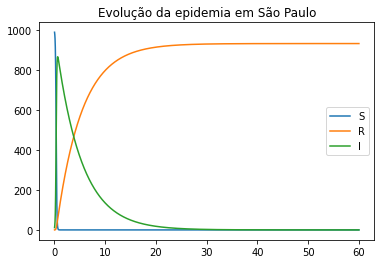

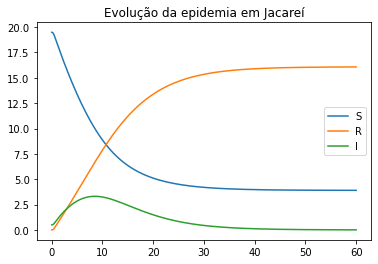

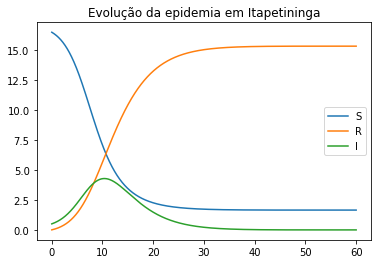

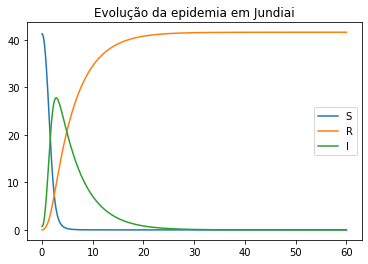

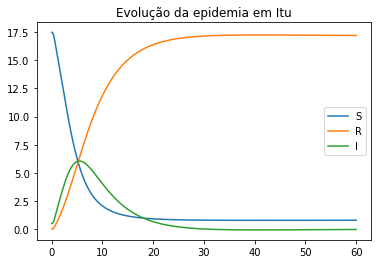

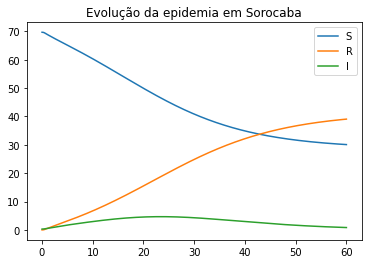

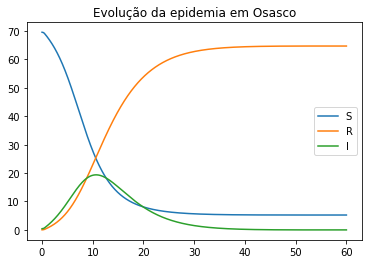

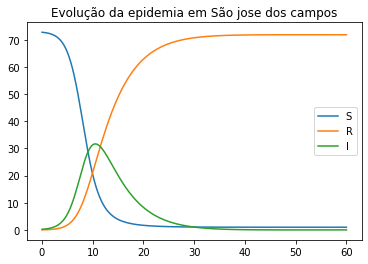

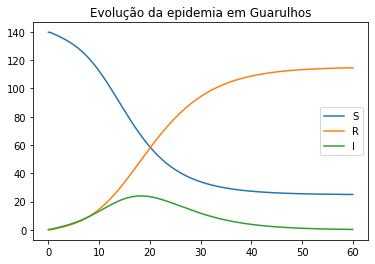

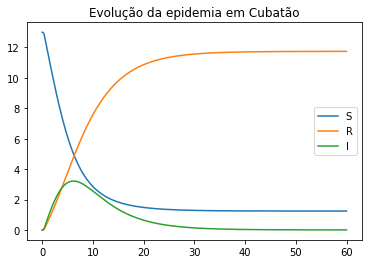

In [ ]:
names = ["São Paulo", "Jacareí", "Itapetininga", "Jundiai", "Itu", "Sorocaba", "Osasco", "São jose dos campos", "Guarulhos", "Cubatão" ]
for i in range(n):
  plt.title(f"Evolução da epidemia em {names[i]}")
  plt.plot(tl, Sl[i], label='S')
  plt.plot(tl, Rl[i], label='R')
  plt.plot(tl, Il[i], label='I')
  plt.legend()
  plt.show()

##Versão estocástica do modelo

Usando a versão estocástica do modelo, há uma probabilidade de as pessoas transitarem de uma cidade para outra, o que afeta a forma como a doença se espalha.

###Simulação 1

Nesta simulação estocástisca, consideramos que havia apenas um indivíduo infectado inicialmente, o qual está localizado na cidade de São Paulo (a maior cidade, tanto em população quanto no número de vértices incidentes que geram uma aresta). 

In [ ]:
n = 10
TMax = 60
DT = 0.01
tl = np.arange(DT, TMax, DT)

# Parametros de cada regiao
N0 = 1000
I0 = 1
R0 = 0
S0 = N0 - I0 - R0
r0 = 0.005
a0 = 1/5

N1 = 20
I1 = 0
R1 = 0
S1 = N1 - I1 - R1
r1 = 0.05
a1 = 1/5

N2 = 17
I2 = 0
R2 = 0
S2 = N2 - I2 - R2
r2 = 0.05
a2 = 1/5

N3 = 42
I3 = 0
R3 = 0
S3 = N3 - I3 - R3
r3 = 0.05
a3 = 1/5

N4 = 18
I4 = 0
R4 = 0
S4 = N4 - I4 - R4
r4 = 0.05
a4 = 1/5

N5 = 70
I5 = 0.1
R5 = 0
S5 = N5 - I5 - R5
r5 = 0.005
a5 = 1/5

N6 = 70
I6 = 0.1
R6 = 0
S6 = N6 - I6 - R6
r6 = 0.005
a6 = 1/5

N7 = 73
I7 = 0.1
R7 = 0
S7 = N7 - I7 - R7
r7 = 0.005
a7 =1/5

N8 = 140
I8 = 0.1
R8 = 0
S8 = N8 - I8 - R8
r8 = 0.005
a8 = 1/5

N9 = 13
I9 = 0
R9 = 0
S9 = N9 - I9 - R9
r9 = 0.05
a9 = 1/5

pop_total = N0 + N1 + N2 + N3 + N4 + N5 + N6 + N7 + N8 + N9
# Listas dos Parametros
lista_parametros = [[S0,I0,R0,a0,r0],[S1,I1,R1,a1,r1],[S2,I2,R2,a2,r2],[S3,I3,R3,a3,r3],[S4,I4,R4,a4,r4],[S5,I5,R5,a5,r5],[S6,I6,R6,a6,r6],[S7,I7,R7,a7,r7],[S8,I8,R8,a8,r8],[S9,I9,R9,a9,r9]]


# Listas
Sl = [[0 for j in range(len(tl))]for i in range(n)]
Il = [[0 for j in range(len(tl))]for i in range(n)]
Rl = [[0 for j in range(len(tl))]for i in range(n)]

for i in range(n):
  Sl[i][0] = lista_parametros[i][0]
  Il[i][0] = lista_parametros[i][1]
  Rl[i][0] = lista_parametros[i][2]


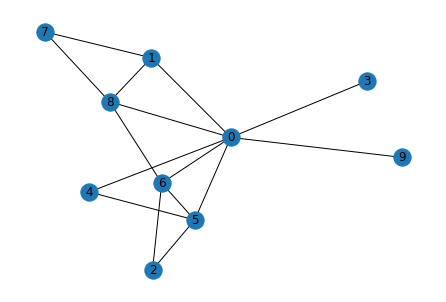

In [ ]:
#criar Grafo
G = nx.Graph()
G.add_node(0) # Cidade de São Paulo
G.add_node(1) # Cidade de Jacarei 
G.add_node(2)  # Cidade de Itapetininga
G.add_node(3) # Cidade de Jundiai
G.add_node(4) # Cidade de Itu
G.add_node(5)  # Cidade de Sorocaba
G.add_node(6)  # Cidade de Osasco
G.add_node(7) # Cidade de São jose dos campos
G.add_node(8) # Cidade de Guarulhos
G.add_node(9) # Cidade de Cubatão
G.add_edge(0,1) #1
G.add_edge(0,3) #2
G.add_edge(0,4) #3
G.add_edge(0,5) #4
G.add_edge(0,6) #5
G.add_edge(0,8) #6
G.add_edge(0,9) #7
G.add_edge(7,1) #8
G.add_edge(2,5) #9
G.add_edge(6,8) #10
G.add_edge(6,5) #11
G.add_edge(6,2) #12
G.add_edge(4,5) #13
G.add_edge(8,1) #14
G.add_edge(8,7) #15
g1 = 0.01
g2 = 0.01
g3 = 0.01
g4 = 0.01
g5 = 0.01
g6 = 0.01
g7 = 0.01
g8 = 0.02
g9 = 0.008
g10 = 0.03
g11 = 0.03
g12 = 0.09
g13 = 0.06
g14 = 0.005
g15 = 0.07
g = [0, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.008, 0.03, 0.03, 0.09, 0.06, 0.005, 0.07]


nx.draw(G, with_labels = True, pos = nx.spring_layout(G,  seed = 100))

In [ ]:
#calculos
count = 0
for t in np.arange(DT, TMax, DT):
   #print("count:", count)
  var = 0
  
  for i in G:
    prob = [rd.random() for j in range(16)]
    aux = [0 for j in range(16)]
    for k in range(16):
      if k != 0:
        if prob[k] > 0.5:
          aux[k] = g[k]
        else:
          aux[k] = 0
    if count == 0:
      var = count
    else:
      var = count - 1
    
    Si = Sl[i][var]
    Ii = Il[i][var]
    Ri = Rl[i][var]
    r = lista_parametros[i][4]
    a = lista_parametros[i][3]

    soma = Ii

    if i == 0: # Sp
      soma += (aux[1] * Il[1][var]) + (aux[2]* Il[3][var]) + (aux[3] * Il[4][var]) + (aux[4] * Il[5][var]) + (aux[5] * Il[6][var]) + (aux[6] * Il[8][var]) + (aux[7] * Il[9][var])
      #print(soma)
    if i == 1: # Jacarei
      soma += aux[1]* Il[0][var] + aux[8] * Il[7][var] + aux[14] * Il[8][var]
    if i == 2:  
      soma += aux[9] * Il[5][var] + aux[12] * Il[6][var]
    if i == 3:
      soma += aux[2] * Il[0][var]
    if i == 4: # Itu
      soma += aux[3] * Il[0][var] + aux[13] * Il[5][var]
    if i == 5:
      soma += aux[4] * Il[0][var] + aux[9] * Il[2][var] + aux[11] * Il[6][var] + aux[13] * Il[4][var]
    if i == 6:
      soma += aux[5] * Il[0][var] + aux[10] * Il[8][var] + aux[11] * Il[5][var] + aux[12] * Il[2][var]
    if i == 7:
      soma += aux[8] * Il[1][var] + aux[15] * Il[8][var]
    if i == 8:
      soma += aux[6] * Il[0][var] + aux[10] * Il[6][var] + aux[14] * Il[1][var] + aux[15] * Il[7][var]
    if i == 9:
      soma += aux[7] * Il[0][var]

    Si += ((-1)* r * Si * soma) * DT
    Ii += (r * Si *soma - a * soma) * DT
    Ri += (a * soma )* DT

    Sl[i][count] = Si
    Il[i][count] = Ii
    Rl[i][count] = Ri
  count += 1



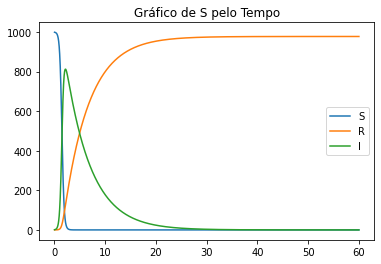

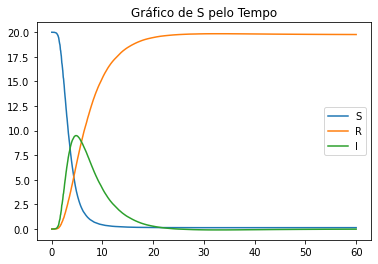

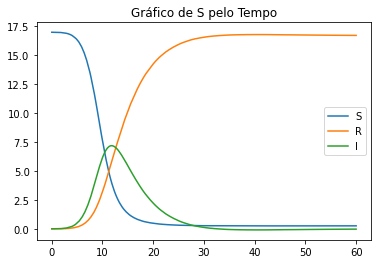

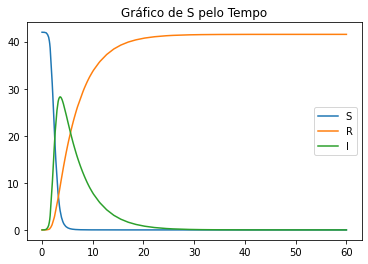

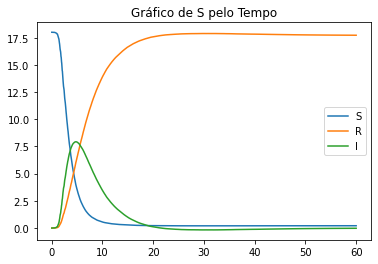

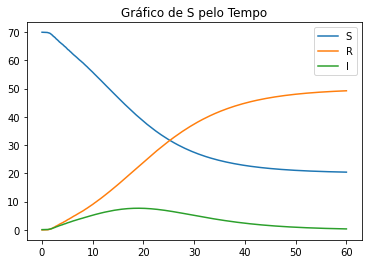

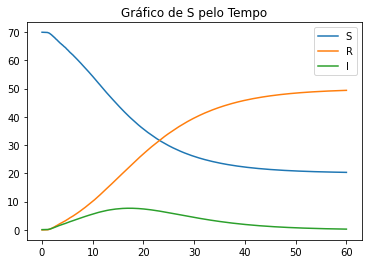

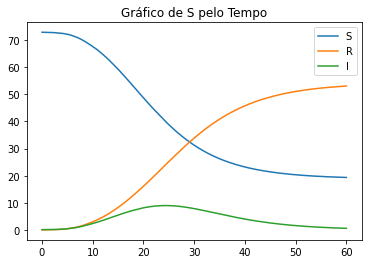

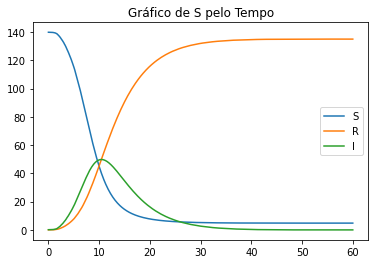

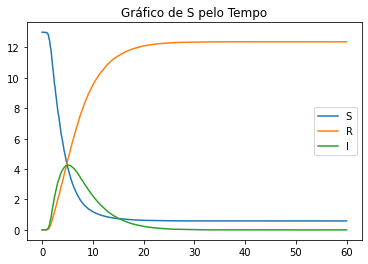

In [ ]:
for i in range(n):
  plt.title("Gráfico de S pelo Tempo")
  plt.plot(tl, Sl[i], label='S')
  plt.plot(tl, Rl[i], label='R')
  plt.plot(tl, Il[i], label='I')
  plt.legend()
  plt.show()

###Simulação 2

Repetição dos parâmetros da simulação passada, porém aumentando a quantidade de dias necessários para um indivíduo da rede se curar, o que resulta em uma maior chance desse indivíduo contaminar outro com a doença.

In [ ]:
n = 10
TMax = 60
DT = 0.01
tl = np.arange(DT, TMax, DT)

# Parametros de cada regiao
N0 = 1000
I0 = 1
R0 = 0
S0 = N0 - I0 - R0
r0 = 0.005
a0 = 1/15

N1 = 20
I1 = 0
R1 = 0
S1 = N1 - I1 - R1
r1 = 0.05
a1 = 1/15

N2 = 17
I2 = 0
R2 = 0
S2 = N2 - I2 - R2
r2 = 0.05
a2 = 1/15

N3 = 42
I3 = 0
R3 = 0
S3 = N3 - I3 - R3
r3 = 0.05
a3 = 1/15

N4 = 18
I4 = 0
R4 = 0
S4 = N4 - I4 - R4
r4 = 0.05
a4 = 1/15

N5 = 70
I5 = 0.1
R5 = 0
S5 = N5 - I5 - R5
r5 = 0.005
a5 = 1/15

N6 = 70
I6 = 0.1
R6 = 0
S6 = N6 - I6 - R6
r6 = 0.005
a6 = 1/15

N7 = 73
I7 = 0.1
R7 = 0
S7 = N7 - I7 - R7
r7 = 0.005
a7 =1/15

N8 = 140
I8 = 0.1
R8 = 0
S8 = N8 - I8 - R8
r8 = 0.005
a8 = 1/15

N9 = 13
I9 = 0
R9 = 0
S9 = N9 - I9 - R9
r9 = 0.05
a9 = 1/15

pop_total = N0 + N1 + N2 + N3 + N4 + N5 + N6 + N7 + N8 + N9
# Listas dos Parametros
lista_parametros = [[S0,I0,R0,a0,r0],[S1,I1,R1,a1,r1],[S2,I2,R2,a2,r2],[S3,I3,R3,a3,r3],[S4,I4,R4,a4,r4],[S5,I5,R5,a5,r5],[S6,I6,R6,a6,r6],[S7,I7,R7,a7,r7],[S8,I8,R8,a8,r8],[S9,I9,R9,a9,r9]]


# Listas
Sl = [[0 for j in range(len(tl))]for i in range(n)]
Il = [[0 for j in range(len(tl))]for i in range(n)]
Rl = [[0 for j in range(len(tl))]for i in range(n)]

for i in range(n):
  Sl[i][0] = lista_parametros[i][0]
  Il[i][0] = lista_parametros[i][1]
  Rl[i][0] = lista_parametros[i][2]


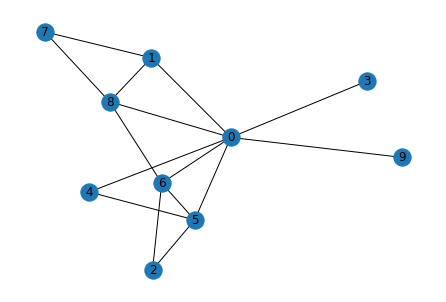

In [ ]:
#criar Grafo
G = nx.Graph()
G.add_node(0) # Cidade de São Paulo
G.add_node(1) # Cidade de Jacarei 
G.add_node(2)  # Cidade de Itapetininga
G.add_node(3) # Cidade de Jundiai
G.add_node(4) # Cidade de Itu
G.add_node(5)  # Cidade de Sorocaba
G.add_node(6)  # Cidade de Osasco
G.add_node(7) # Cidade de São jose dos campos
G.add_node(8) # Cidade de Guarulhos
G.add_node(9) # Cidade de Cubatão
G.add_edge(0,1) #1
G.add_edge(0,3) #2
G.add_edge(0,4) #3
G.add_edge(0,5) #4
G.add_edge(0,6) #5
G.add_edge(0,8) #6
G.add_edge(0,9) #7
G.add_edge(7,1) #8
G.add_edge(2,5) #9
G.add_edge(6,8) #10
G.add_edge(6,5) #11
G.add_edge(6,2) #12
G.add_edge(4,5) #13
G.add_edge(8,1) #14
G.add_edge(8,7) #15
g1 = 0.01
g2 = 0.01
g3 = 0.01
g4 = 0.01
g5 = 0.01
g6 = 0.01
g7 = 0.01
g8 = 0.02
g9 = 0.008
g10 = 0.03
g11 = 0.03
g12 = 0.09
g13 = 0.06
g14 = 0.005
g15 = 0.07
g = [0, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.008, 0.03, 0.03, 0.09, 0.06, 0.005, 0.07]


nx.draw(G, with_labels = True, pos = nx.spring_layout(G,  seed = 100))

In [ ]:
#calculos
count = 0
for t in np.arange(DT, TMax, DT):
   #print("count:", count)
  var = 0
  
  for i in G:
    prob = [rd.random() for j in range(16)]
    aux = [0 for j in range(16)]
    for k in range(16):
      if k != 0:
        if prob[k] > 0.5:
          aux[k] = g[k]
        else:
          aux[k] = 0
    if count == 0:
      var = count
    else:
      var = count - 1
    
    Si = Sl[i][var]
    Ii = Il[i][var]
    Ri = Rl[i][var]
    r = lista_parametros[i][4]
    a = lista_parametros[i][3]

    soma = Ii

    if i == 0: # Sp
      soma += (aux[1] * Il[1][var]) + (aux[2]* Il[3][var]) + (aux[3] * Il[4][var]) + (aux[4] * Il[5][var]) + (aux[5] * Il[6][var]) + (aux[6] * Il[8][var]) + (aux[7] * Il[9][var])
      #print(soma)
    if i == 1: # Jacarei
      soma += aux[1]* Il[0][var] + aux[8] * Il[7][var] + aux[14] * Il[8][var]
    if i == 2:  
      soma += aux[9] * Il[5][var] + aux[12] * Il[6][var]
    if i == 3:
      soma += aux[2] * Il[0][var]
    if i == 4: # Itu
      soma += aux[3] * Il[0][var] + aux[13] * Il[5][var]
    if i == 5:
      soma += aux[4] * Il[0][var] + aux[9] * Il[2][var] + aux[11] * Il[6][var] + aux[13] * Il[4][var]
    if i == 6:
      soma += aux[5] * Il[0][var] + aux[10] * Il[8][var] + aux[11] * Il[5][var] + aux[12] * Il[2][var]
    if i == 7:
      soma += aux[8] * Il[1][var] + aux[15] * Il[8][var]
    if i == 8:
      soma += aux[6] * Il[0][var] + aux[10] * Il[6][var] + aux[14] * Il[1][var] + aux[15] * Il[7][var]
    if i == 9:
      soma += aux[7] * Il[0][var]

    Si += ((-1)* r * Si * soma) * DT
    Ii += (r * Si *soma - a * soma) * DT
    Ri += (a * soma )* DT

    Sl[i][count] = Si
    Il[i][count] = Ii
    Rl[i][count] = Ri
  count += 1



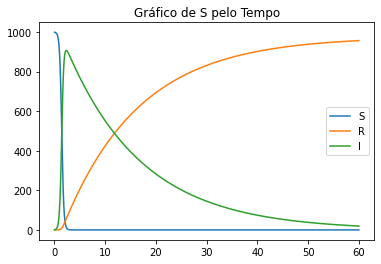

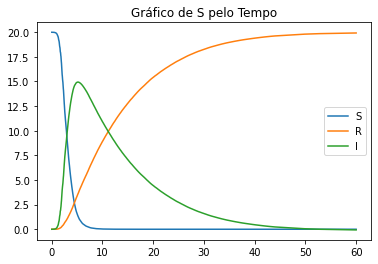

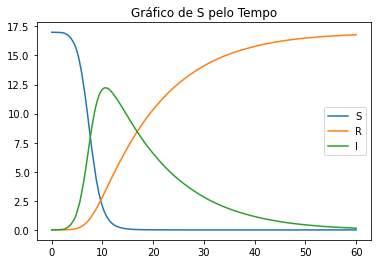

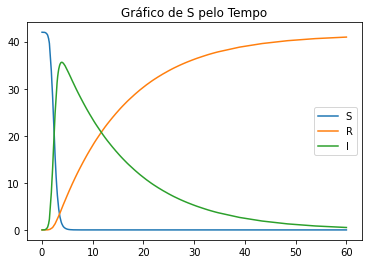

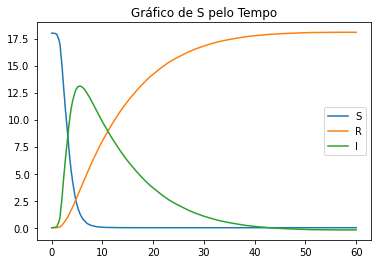

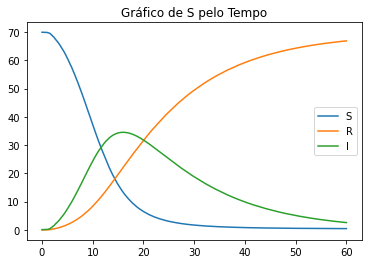

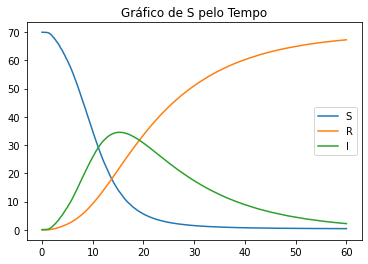

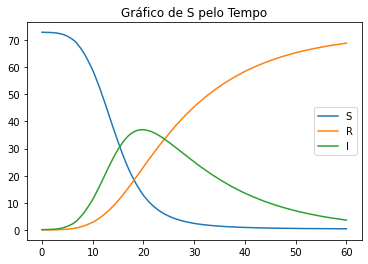

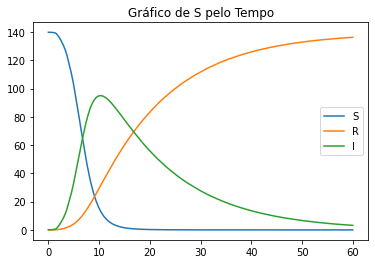

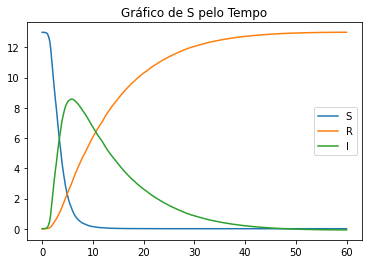

In [ ]:
for i in range(n):
  plt.title("Gráfico de S pelo Tempo")
  plt.plot(tl, Sl[i], label='S')
  plt.plot(tl, Rl[i], label='R')
  plt.plot(tl, Il[i], label='I')
  plt.legend()
  plt.show()